In [2]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split, cross_val_score

# KNN Section

In [3]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')

X_train = train.drop(['High Income'], axis=1)
y_train = train['High Income']

X_test = test.drop(['High Income'], axis=1)
y_test = test['High Income']

### Calculate train/test accuracy with varied K

In [4]:
k_values = [1, 2, 3, 4, 5, 10, 15, 20, 30, 32]
train_accuracy = []
test_accuracy = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

In [5]:
print(train_accuracy)

[1.0, 0.96875, 0.9375, 0.96875, 0.9375, 0.84375, 0.84375, 0.90625, 0.90625, 0.5]


In [6]:
print(test_accuracy)

[0.875, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5]


### Plot for sanity check

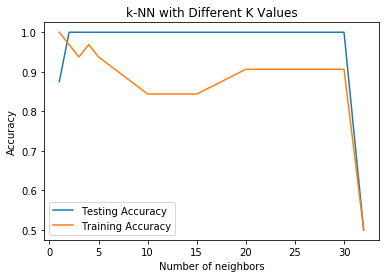

In [7]:
plt.title('k-NN with Different K Values')
plt.plot(k_values, test_accuracy, label='Testing Accuracy')
plt.plot(k_values, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

### Write into a CSV to use 

In [8]:
accuracies_tr = pd.DataFrame({"k": k_values, "accuracy": train_accuracy})
accuracies_tr['type'] = 'train'

accuracies_te = pd.DataFrame({"k": k_values, "accuracy": test_accuracy})
accuracies_te['type'] = 'test'

In [9]:
accuracies = pd.concat([accuracies_tr, accuracies_te])
accuracies.to_csv('KNN_Accuracies.csv', index = False)

# Model Performance Section

In [10]:
adult = pd.read_csv("adult.csv")

mask = adult.applymap(type) == bool
d = {">50K": 1, "<=50K": 0}
adult = adult.where(mask, adult.replace(d))

data = adult[['age', 'education.num', 'income']]
data['income'] = data["income"].astype(str).astype(int)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
X = data.drop(['income'], axis=1)
y = data['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)


In [12]:
"""
train_accuracy = []
test_accuracy = []
for k in range(1, 1000, 10):
    print(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))
"""

'\ntrain_accuracy = []\ntest_accuracy = []\nfor k in range(1, 1000, 10):\n    print(k)\n    knn = KNeighborsClassifier(n_neighbors = k)\n    knn.fit(X_train, y_train)\n    train_accuracy.append(knn.score(X_train, y_train))\n    test_accuracy.append(knn.score(X_test, y_test))\n'

In [13]:
""" 
k_values = list(range(1, 1000, 10))

plt.plot(k_values, test_accuracy, label='Testing Accuracy')
plt.plot(k_values, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()
"""

" \nk_values = list(range(1, 1000, 10))\n\nplt.plot(k_values, test_accuracy, label='Testing Accuracy')\nplt.plot(k_values, train_accuracy, label='Training Accuracy')\nplt.legend()\nplt.xlabel('Number of neighbors')\nplt.ylabel('Accuracy')\nplt.show()\n"

In [14]:
len(X_train)

24420

In [15]:
math.sqrt(24420)

# https://stackoverflow.com/questions/11568897/value-of-k-in-k-nearest-neighbor-algorithm#:~:text=So%20the%20value%20of%20k,samples%20in%20your%20training%20dataset.

156.26899884494046

In [16]:
# k = sqrt(n)
knn = KNeighborsClassifier(n_neighbors = 157)
print(cross_val_score(knn, X_train, y_train, cv=5))

knn.fit(X_train, y_train)
print("Train accuracy: " + str(knn.score(X_train, y_train)))
print("Test accuracy: " + str(knn.score(X_test, y_test)))

[0.79115479 0.78931204 0.79381654 0.78112203 0.79115479]
Train accuracy: 0.7940212940212941
Test accuracy: 0.7884780739466896


In [17]:
# k = sqrt(n) / 2 (rounded up)
knn = KNeighborsClassifier(n_neighbors = 79)
print(cross_val_score(knn, X_train, y_train, cv=5))

knn.fit(X_train, y_train)
print("Train accuracy: " + str(knn.score(X_train, y_train)))
print("Test accuracy: " + str(knn.score(X_test, y_test)))

[0.7956593  0.79176904 0.79484029 0.78132678 0.79361179]
Train accuracy: 0.7945945945945946
Test accuracy: 0.7867583834909716


# Overall Table for Model Selection

In [20]:
alg = ["KNN", "Dt", "LogReg"]
training_accuracy = [0.794, 0.799, 0.783]
test_accuracy = [.787, 0.784, 0.778]


overall = pd.DataFrame({'alg': alg, "train": training_accuracy, "test": test_accuracy})
overall.to_csv('model_selection.csv', index = False)